<h1>Case Raccoon: Projeto Engenharia de Dados</h1>

<h3>Importando bibliotecas e as tabelas do excel</h3>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.mode.chained_assignment = None

urlbandas = 'https://raw.githubusercontent.com/impablojansen/case_raccoon/main/psel_de_bandas.csv'
urlcompras = 'https://raw.githubusercontent.com/impablojansen/case_raccoon/main/psel_de_compras.csv'
urlingressos = 'https://raw.githubusercontent.com/impablojansen/case_raccoon/main/psel_de_ingressos.csv'

bandas = pd.read_csv(urlbandas, sep=';')
compras = pd.read_csv(urlcompras, sep=';')
ingressos = pd.read_csv(urlingressos, sep=';')

bandas.reset_index(drop=True)
compras.reset_index(drop=True)
ingressos.reset_index(drop=True)


compras.rename(columns = {' gastos ':'gastos'}, inplace = True)

<h3>Adicionando coluna com o dia (número) do show na tabela de gastos</h3>

In [ ]:
## Add coluna com o DIA do show na tabela de GASTOS

def categorise(row):
    if row['show'] == 'Terrestrial Chair':
        return "1"
    elif row['show'] == 'Nascent Letter':
        return "2"
    elif row['show'] == 'Symbolic Toy':
        return "3"
    
compras['dia'] = compras.apply(lambda row: categorise(row), axis=1).astype(str)

<h3>Transformando o dia em string</h3>

In [ ]:
ingressos = ingressos.astype(str)

<h3>Encontrando clientes que, independente de conseguirem comprar ou não, estão na lista de consumação e na lista de tentativa de compra.</h3>

In [ ]:
tentou_comprar_e_foi = ingressos.loc[ingressos['nome'].isin(compras['nome']) & ingressos['dia'].isin(compras['dia'])]

<h3>Encontrando clientes que concluíram a compra e compareceram ao show</h3>

In [ ]:
boolean_compra_concluida = (tentou_comprar_e_foi['status'] == "Concluido")
comprou_e_foi = tentou_comprar_e_foi[boolean_compra_concluida].astype(str)

<h3>Encontrando clientes que compraram ingresso 'Pista' com a AT</h3>

In [ ]:
ingresso_tipo_pista = comprou_e_foi[(comprou_e_foi['tipo'] == "Pista")]

<h3>Lista dos clientes que desistiram de comprar com a AT mas foram ao show</h3>

In [ ]:
nao_comprou_mas_foi = tentou_comprar_e_foi.loc[~tentou_comprar_e_foi['nome'].isin(comprou_e_foi['nome']) & tentou_comprar_e_foi['dia'].isin(comprou_e_foi['dia'])]

<h3>Reorganizando as colunas e criando tabelas auxiliares para ajudar na filtragem dos dados.</h3>

In [ ]:
#compras = compras[['dia', 'nome', 'gastos', 'show']]

## CA = "Compra" auxiliar

ca = compras
ca['novo'] = ca['dia'] + ca['nome']

## NCMFA = "Não Comprou Mas Foi" auxiliar

ncmfa = nao_comprou_mas_foi
ncmfa['novo'] = ncmfa['dia'] + ncmfa['nome']

## ITP = "Clientes com 'Ingresso tipo Pista' auxiliar"

itpa = ingresso_tipo_pista
itpa['novo'] = itpa['dia'] + itpa['nome']

<h3><b>QUESTÃO 1: QUAL A MÉDIA DE GASTOS DE PESSOAS COM INGRESSO PISTA?</b></h3>

In [ ]:
media_tipo_pista = ca.loc[ca['novo'].isin(itpa['novo'])]
media_tipo_pista = media_tipo_pista.drop(['dia', 'novo'], axis = 1)
respostaq1 = media_tipo_pista['gastos'].round(1).mean()

print(f'A média dos gastos de pessoas com ingresso pista foi de: R$ {respostaq1}')

A média dos gastos de pessoas com ingresso pista foi de: R$ 3875.7125


<h3><b>QUESTÃO 2: QUAIS PESSOAS NÃO COMPARECERAM AO SHOW?</b></h3>

In [ ]:
tentou_comprar_e_nao_foi = ingressos.loc[~ingressos['nome'].isin(compras['nome'])]
respostaq2 = tentou_comprar_e_nao_foi['nome'].unique()

print(f'Lista das pessoas que não compareceram ao show, independente de ter conseguido comprar ou não o ingresso:\n\n {respostaq2}')

Lista das pessoas que não compareceram ao show, independente de ter conseguido comprar ou não o ingresso:

 ['Alice Gamba' 'Amy Mejia' 'Brenda Key' 'Brenda Kozak' 'Courtney Edwards'
 'Curtis Hernandez' 'Deborah Silsby' 'Donna Chandler' 'Edward Smith'
 'Elizabeth Daly' 'Frances Lambert' 'Frank Houck' 'James Coffey'
 'Linda Batiz' 'Marcela Nelson' 'Maria Villa' 'Matt Smudrick'
 'Miguel Ramey' 'Nancy Degroot' 'Nancy Smith' 'Pamela Nixon'
 'Ricardo Clasby' 'Rick Fleishman' 'Robert Copenhaver' 'Sandra Duncan'
 'Travis Whatley' 'Yong Baltazar']


<h3><b>QUESTÃO 3: QUAIS PESSOAS COMPRARAM INGRESSOS COM CONCORRENTES?<b></h3>

In [ ]:
comprou_com_concorrentes = compras.loc[~compras['nome'].isin(comprou_e_foi['nome'])]
respostaq3 = comprou_com_concorrentes['nome'].unique()

print(f'Lista das pessoas que compraram ingresso com concorrentes:\n\n {respostaq3}')

Lista das pessoas que compraram ingresso com concorrentes:

 ['Adelina Thews' 'Alan Gravois' 'Albert Fadden' 'Alberto Gumm'
 'Allen Bylsma' 'Allison Magill' 'Amanda Jones' 'Andrea Galyen'
 'Andrew Hoff' 'Anna Hines' 'Anthony King' 'Anthony Nokes'
 'Arthur Steiner' 'Belen Bradley' 'Benjamin Mcdonald' 'Benny Boisen'
 'Beth Evans' 'Betty Lynch' 'Betty Moore' 'Beverly Redfern' 'Blanche Knox'
 'Bobby Rick' 'Brandy Barnes' 'Brian Mann' 'Brittney Birkey' 'Bruce Hicks'
 'Bryan Rayford' 'Caleb Munselle' 'Candy Killough' 'Carl Weber'
 'Carol Eash' 'Carol Meeker' 'Cassandra Gonsalves' 'Catalina Berry'
 'Catherine Loos' 'Charles Hershenson' 'Chelsea Banter' 'Cheryl West'
 'Chester Chavez' 'Chris Wright' 'Christopher Mueller' 'Clarence Sharp'
 'Courtney Chapman' 'Craig Wrisley' 'Cynthia Daves' 'Daniel Markell'
 'Daniel Puckett' 'Danielle Gill' 'Darrel Allmand' 'David Pendergraph'
 'Debra Howard' 'Denise Trapp' 'Dennis Miller' 'Derrick Collins'
 'Donald Williams' 'Donna Marinas' 'Dorothy Simmons' 'E

<h3><b>QUESTÃO 4: QUAL O DIA COM MAIOR GASTO?</b></h3>

In [ ]:
gastos_por_dia = compras.groupby(['dia', 'show']).sum().sort_values(by=['dia']).reset_index()
tabela_gastos_dia = gastos_por_dia.sort_values(by=['gastos'], ascending=False)
tabela_gastos_dia['gastos'] = (gastos_por_dia['gastos'].apply(lambda x: "R$ {:_.2f}".format(x).replace('.', ',').replace('_', '.')))
max_gasto = tabela_gastos_dia['gastos'][2]

In [ ]:
print(tabela_gastos_dia.to_string(index=False))
print(f'\nLogo, podemos perceber que o terceiro dia de show foi o dia com maior gasto, com um total gasto de {max_gasto}')

dia              show        gastos
  3      Symbolic Toy R$ 330.810,92
  1 Terrestrial Chair R$ 319.930,31
  2    Nascent Letter R$ 269.765,88

Logo, podemos perceber que o terceiro dia de show foi o dia com maior gasto, com um total gasto de R$ 330.810,92


<h4>BONUS: Gráfico com os gastos de cada dia de show</h4>

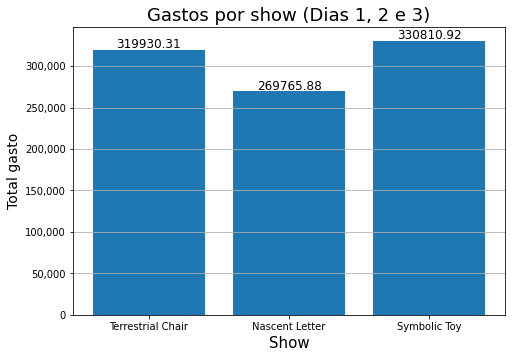

In [ ]:
fig = plt.figure(figsize=(6,4))
data = gastos_por_dia
ax = fig.add_axes([0,0,1,1])
ax.set_title("Gastos por show (Dias 1, 2 e 3)", fontsize=18)
plt.xlabel('Show', fontsize=15)
plt.ylabel('Total gasto', fontsize=14)
plt.grid(axis='y')
plot = plt.bar(gastos_por_dia['show'], gastos_por_dia['gastos'])
def xfunc(x, pos):
    s = '{:0,d}'.format(int(x))
    return s
x_format = plt.FuncFormatter(xfunc)
ax.yaxis.set_major_formatter(x_format)

for i in plot.patches:
    plt.annotate(i.get_height(),
                  (i.get_x() + i.get_width() / 2, i.get_height()),
                ha='center', va='baseline',fontsize=12, color='black',
                xytext=(0,2),
                 textcoords='offset points')

    
plt.show()

<h3><b>QUESTÃO 5: FAÇA UMA LISTA COM OS CLIENTES QUE DESISTIRAM DE COMPRAR O INGRESSO COM A AT, A SOMA DO VALOR QUE FOI GASTO DURANTE OS SHOWS E QUAIS SHOWS ELES DESISTIRAM DE COMPRAR.</b></h3>

In [ ]:
lista_desistiu_compra = ca.loc[ca['novo'].isin(ncmfa['novo'])]
# REMOVENDO COLUNA AUXILIAR
lista_desistiu_compra = lista_desistiu_compra.drop(['dia', 'novo'], axis = 1)

In [ ]:
respostaq5 = lista_desistiu_compra.groupby('nome').agg({'gastos': sum, 'show': lambda x: list(set(x))}).reset_index()
print(respostaq5.to_string(index=False))

              nome   gastos                                show
     Andrea Galyen  5133.81   [Terrestrial Chair, Symbolic Toy]
 Benjamin Mcdonald  2309.81                 [Terrestrial Chair]
      Blanche Knox   924.31                 [Terrestrial Chair]
Charles Hershenson   163.44                 [Terrestrial Chair]
    Daniel Puckett  1489.02                 [Terrestrial Chair]
      Debra Howard  5879.15                 [Terrestrial Chair]
     Edna Martinez  9415.36 [Nascent Letter, Terrestrial Chair]
         Emil Nord  4798.81                    [Nascent Letter]
     Frank Davilla  1724.35                    [Nascent Letter]
      Gerald Allen  3447.17                 [Terrestrial Chair]
      James Reaves  5035.27                    [Nascent Letter]
      Jarrod Adler  1070.84                 [Terrestrial Chair]
      Jeffrey Pace  5810.78                 [Terrestrial Chair]
       Joseph Wray  3142.35                      [Symbolic Toy]
  Joshua Sanderson  1775.60             

<h2><b>ATENÇÃO!</b><br><br> Para baixar o arquivo JSON com a resposta da questão 5, descomente e rode a célula de código abaixo</h2>

In [ ]:
##lista_desistiu_compra.groupby('nome').agg({'gastos': sum, 'show': lambda x: list(set(x))}).reset_index().to_json('resposta_questao5.json', orient='records', indent=4)